# Rapport : analyse de données sur les statistiques des meurtres de journalistes dans le monde depuis 1992.

**Auteurs :** 
- [Adrien FROECHLY](https://github.com/AlikakilA)
- [Quentin GROS](https://github.com/quent1grs)
- [Loïc GLANOIS](https://github.com/loicglanoisatynov)

Ce rapport a pu être généré grâce à la base de données récupéré à l'adresse suivante : https://github.com/ali-ce/datasets/blob/master/Journalists-Killed-since-1992/Journalists.csv

## Caractéristiques générales

In [ ]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
except ImportError:
    print("Les librairies nécessaires ne se sont pas importées correctement")
else:
    print("Les librairies ont bien été importées")

Les librairies ont bien été importées


In [ ]:
try:
    df = pd.read_csv("Journalists.csv")
except FileNotFoundError:
    print("Le fichier n'a pas été trouvé")
else:
    print("Fichier trouvé.")
    print(df)

Fichier trouvé.
                           Name           Role            Motive   Sex  \
0                    Abay Hailu     Journalist  Motive Confirmed  Male   
1          Abd al-Karim al-Ezzo     Journalist  Motive Confirmed  Male   
2            Abdallah Bouhachek     Journalist  Motive Confirmed  Male   
3     Abdel Aziz Mahmoud Hasoun     Journalist  Motive Confirmed  Male   
4           Abdel Karim al-Oqda     Journalist  Motive Confirmed  Male   
...                         ...            ...               ...   ...   
1575           Unidentified (3)  Media Workers               NaN   NaN   
1576           Unidentified (4)  Media Workers               NaN   NaN   
1577            Waqas Aziz Khan  Media Workers               NaN   NaN   
1578              Yasser Khatab  Media Workers               NaN   NaN   
1579         Ziad Tarek al-Dibo  Media Workers               NaN   NaN   

             Date Killed Year of Death Month of Death Country Killed  \
0      February  9, 199

In [ ]:
try:
    num_of_rows = df.shape[0]
    print("La base de données contient", num_of_rows, "lignes.")
except AttributeError:
    print("Erreur lors du calcul du nombre de lignes")

La base de données contient 1580 lignes.


In [ ]:
# Récupère les noms des colonnes
try:
    columns = df.columns
    print("Les colonnes de la base de données sont : " + str(columns))
except AttributeError:
    print("Erreur lors de la récupération des colonnes")

Les colonnes de la base de données sont : Index(['Name', 'Role', 'Motive', 'Sex', 'Date Killed', 'Year of Death',
       'Month of Death', 'Country Killed', 'Organization', 'Nationality',
       'Medium', 'Job', 'Coverage', 'Freelance', 'Local/Foreign',
       'Source of Fire', 'Type of Death', 'Impunity (for Murder)',
       'Taken Captive', 'Threatened', 'Tortured', 'Profile on CPJ', 'Image',
       'Description', 'Date of Death'],
      dtype='object')


In [ ]:
try:
    month_map = {
        'January': '01', 'February': '02', 'March': '03', 'April': '04',
        'May': '05', 'June': '06', 'July': '07', 'August': '08',
        'September': '09', 'October': '10', 'November': '11', 'December': '12'
    }
    
    df_latest = df.loc[df['Year of Death'].idxmax()]
    row = df_latest
    print("L'entrée la plus récente correspond à " + row['Name'] + ", tué le " + row['Date Killed'] + " en " + str(row['Country Killed'] + "."))
except KeyError:
    print("Erreur lors de la récupération des dates de décès")

L'entrée la plus récente correspond à Anton Voloshin, tué le June 24, 2014 en Ukraine.


La fonction précédente indique que la dernière entrée dans le fichier date de juin 2014, et qu'on ne dispose pas des des chiffres du reste de l'année. Les données du reste de l'année seront déduites au prorata des premiers chiffres de l'année.

### Effectif de l'échantillon 


In [ ]:
effectif_echantillon = data.shape[0]
print(f"Effectif de l'échantillon : {effectif_echantillon}")

### Représentation des journalistes tués par des stickman

In [ ]:
nb_petits_bonhommes = 1580
fig, ax = plt.subplots(figsize=(20, 30))
for i in range(nb_petits_bonhommes):
    x = (i % 40) * 0.5  # 40 "petits bonhommes" par ligne
    y = (i // 40) * 2.0  # Les lignes sont espacées de 2 unités
    plt.plot(x + 0.25, y + 1.5, marker='o', markersize=5, color='black')
    plt.plot([x + 0.25, x + 0.25], [y + 1.0, y + 0.5], color='black', lw=0.5)
    plt.plot([x + 0.25, x + 0.1], [y + 1.0, y + 0.8], color='black', lw=0.5)
    plt.plot([x + 0.25, x + 0.4], [y + 1.0, y + 0.8], color='black', lw=0.5)
    plt.plot([x + 0.2, x + 0.2], [y + 0.5, y + 0.0], color='black', lw=0.5)
    plt.plot([x + 0.3, x + 0.3], [y + 0.5, y + 0.0], color='black', lw=0.5)
plt.xlim(0, 20)
plt.ylim(0, 60)
plt.axis('off')
plt.show()

### Motif De la Mort Confimé

In [ ]:
motif_confirme = data['Motive'].notna().sum()
pourcentage_confirmation_motif = (motif_confirme / effectif_echantillon) * 100
print(f"% de confirmation du motif : {pourcentage_confirmation_motif:.2f}%")


### Pourcentages D'homme / Femmes Tué(e)s

In [ ]:
hommes = data['Sex'] == 'Male'
femmes = data['Sex'] == 'Female'
pourcentage_hommes = (hommes.sum() / effectif_echantillon) * 100
pourcentage_femmes = (femmes.sum() / effectif_echantillon) * 100
print(f"% d'hommes : {pourcentage_hommes:.2f}%")
print(f"% de femmes : {pourcentage_femmes:.2f}%")
plt.pie([pourcentage_hommes, pourcentage_femmes], labels=['Hommes', 'Femmes'], autopct='%1.1f%%')
plt.title('Répartition hommes/femmes/inconnu')
plt.axis('equal')  
plt.show()

### Calcul de la répartition des morts sur les années depuis 1992

In [ ]:
morts_par_annee = data['Year of Death'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
morts_par_annee.plot(kind='bar')
plt.title("Répartition des morts par année")
plt.xlabel("Année")
plt.ylabel("Nombre de morts")
plt.show()

## Analyse des données

Le fichier donne des précisions sur la nature du groupe ayant causé la mort de chaque journaliste. La colonne correspondante est la colonne "Source of Fire".

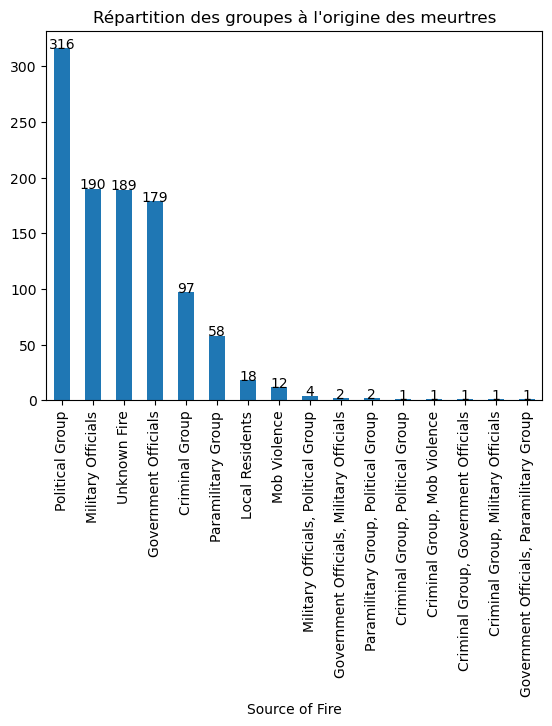

In [ ]:
# Relit le fichier pour éviter les erreurs de lecture
try:
    df = pd.read_csv("Journalists.csv")
except FileNotFoundError:
    print("Erreur")

# Graph sur la répartition de la nature des groupes à l'origine des meurtres. Trie les différents résultats dans la colonne "Source of Fire" et les affiche dans un graphique.
try:
    df['Source of Fire'].value_counts().plot(kind='bar')
    plt.title("Répartition des groupes à l'origine des meurtres")
    for i, v in enumerate(df['Source of Fire'].value_counts()):
        plt.text(i, v, str(v), ha='center')
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

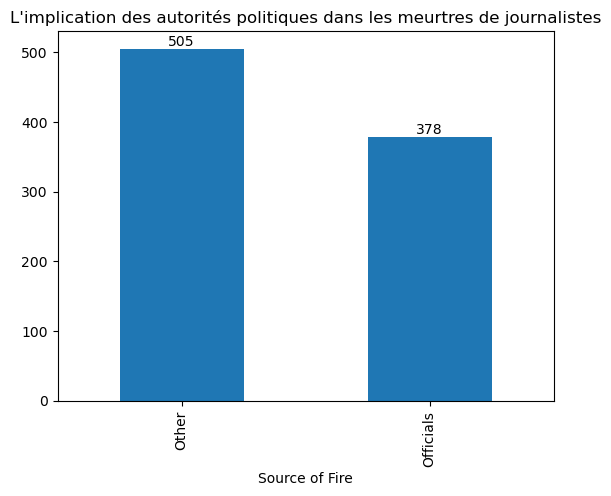

In [ ]:
try:
    df = pd.read_csv("Journalists.csv")
except FileNotFoundError:
    print("Erreur")

try:
    # Filtrer d'abord pour exclure "Unknown Fire" et les valeurs NaN
    df_filtered = df[df['Source of Fire'].notna()]
    df_filtered = df_filtered[df_filtered['Source of Fire'] != 'Unknown Fire']
    
    # Créer les catégories Officials/Other
    mask = df_filtered['Source of Fire'].str.contains('Military Officials|Government Officials', na=False)
    df_filtered.loc[mask, 'Source of Fire'] = 'Officials'
    df_filtered.loc[~mask, 'Source of Fire'] = 'Other'
    
    # Créer le graphique
    ax = df_filtered['Source of Fire'].value_counts().plot(kind='bar')
    plt.title("L'implication des autorités politiques dans les meurtres de journalistes")
    
    # Ajouter les valeurs sur chaque barre
    for i in ax.containers:
        ax.bar_label(i)
    
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

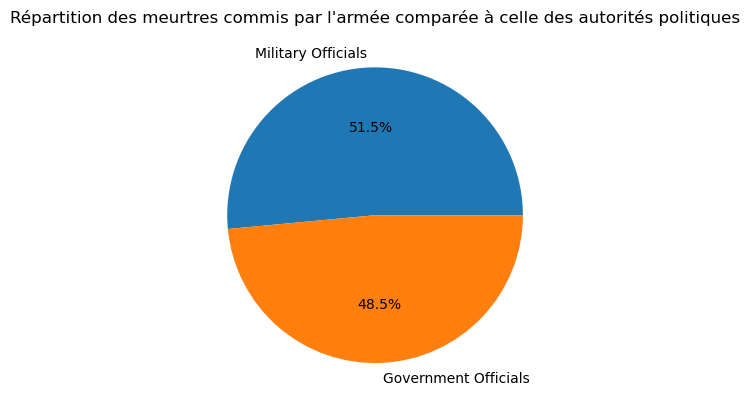

In [ ]:
try:
    # Filtrer pour inclure uniquement "Military Officials" et "Government Officials" purs
    df_filtered = df[df['Source of Fire'].notna()]
    df_filtered = df_filtered[
        (df_filtered['Source of Fire'] == 'Military Officials') | 
        (df_filtered['Source of Fire'] == 'Government Officials')
    ]

    # Créer le graphique en camembert
    ax = df_filtered['Source of Fire'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    
    plt.title("Répartition des meurtres commis par l'armée comparée à celle des autorités politiques")
    plt.ylabel('')  # Retire le label 'count'
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")


# Pourcentages des journalistes tués dans leur pays de nationalité


In [ ]:
try :
    plt.figure(figsize=(6, 6))
    local_killed = data['Country Killed'] == data['Nationality']
    local_count = local_killed.sum()
    foreign_count = len(data) - local_count
    plt.pie([local_count, foreign_count], labels=["Tués dans leur pays", "Tués à l'étranger"], autopct='%1.1f%%', colors=['skyblue', 'orange'])
    plt.title("% des journalistes tués dans leur pays de nationalité")
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

La majorité des journalistes sont tués dans leur pays de nationalité, illustrant une tendance liée à des conflits ou tensions internes.

# Médias les plus représentés

In [ ]:
try:
    plt.figure(figsize=(12, 6))
    media_counts = data['Medium'].value_counts().head(10)
    media_counts.plot(kind='bar', color='purple')
    plt.title("Médias les plus représentés")
    plt.xlabel("Type de média")
    plt.ylabel("Nombre de journalistes")
    plt.tight_layout()
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

Les journalistes issus des médias imprimés et de la radio sont les plus touchés, suivis par la télévision.

# Part des différentes professions (éditeurs, caméramans, etc.)

In [ ]:
try:
    plt.figure(figsize=(12, 6))
    job_counts = data['Job'].value_counts().head(10)
    job_counts.plot(kind='bar', color='green')
    plt.title("Part des différentes professions")
    plt.xlabel("Profession")
    plt.ylabel("Nombre de journalistes")
    plt.tight_layout()
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

Les reporters et éditeurs représentent les professions les plus vulnérables, suivis des photographes et caméramans.

# Part des journalistes spécialisés dans les droits humains et l'anticorruption

In [ ]:
try:
    plt.figure(figsize=(6, 6))
    specialties = data['Coverage'].dropna().str.contains("Human Rights|Corruption", case=False, na=False)
    specialty_count = specialties.sum()
    non_specialty_count = len(data) - specialty_count
    plt.pie([specialty_count, non_specialty_count], labels=["Droits humains et anticorruption", "Autres"], autopct='%1.1f%%', colors=['gold', 'lightblue'])
    plt.title("Part des journalistes spécialisés dans les droits humains et l'anticorruption")
    plt.show()
except KeyError:
    print("Erreur lors de la récupération des données pour le graphique")

Une proportion significative des journalistes tués couvraient les droits humains et l'anticorruption, mettant en lumière leur exposition à des risques élevés dans ces domaines sensibles.